In [8]:
from finesse.virgo import Virgo
from rich.console import Console
from matplotlib.pyplot import figure, show
from numpy import save, array, geomspace
from finesse.analysis.actions import FrequencyResponse

In [9]:
console = Console()

virgo = Virgo()
virgo.make()

Adjusting recycling cavity lengths...
Pretuning...
Optimizing demodulation phases...
Optimizing lock gains...
Running RF locks...
Switching to DARM DC lock...
Done.


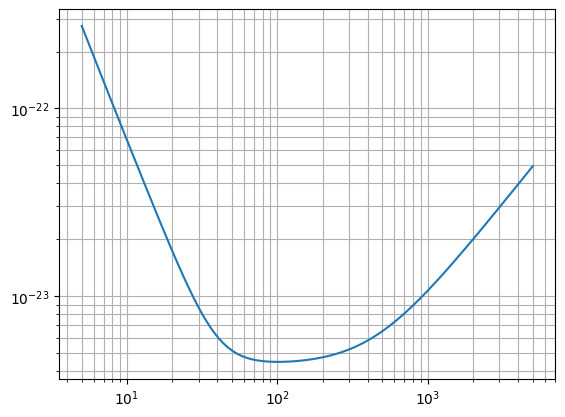

In [10]:
result = virgo.get_QNLS([5, 5000, 1000])

Figure = figure()
_ = Figure.gca().loglog(result.x0, abs(result["NSR_with_RP"]))
Figure.gca().grid(True, "both", "both")
show()

In [11]:
save(
    "sensitivities/finesse-virgo.npy",
    array([result.x0, abs(result["NSR_with_RP"])]),
)

/home/demagny/codes/python/finesse/finesse-simulation-04/.venv/lib/python3.13/site-packages/finesse/analysis/actions/base.py:157: UserWarning: Signal frequency (fsig) was set to None but simulation needs it. Setting default value of 1 Hz
  self.__sim.__enter__()


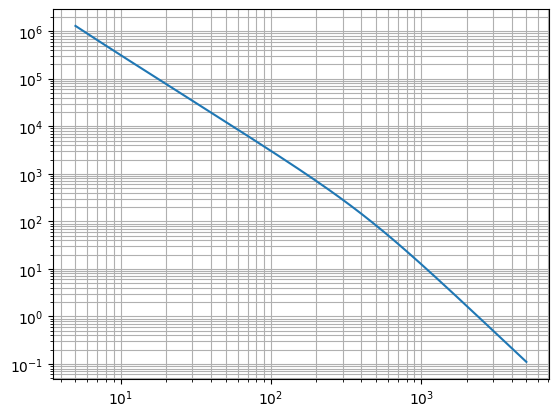

In [13]:
result = virgo.model.run(FrequencyResponse(geomspace(5, 5000, 1000), ["DARM_Fz"], ["B1p_56.I"]))

Figure = figure()
_ = Figure.gca().loglog(result.f, abs(result["B1p_56.I", "DARM_Fz"]))
Figure.gca().grid(True, "both", "both")
show()

array([<Axes: title={'center': 'DARM TF'}, ylabel='Amplitude [$\\sqrt{W}$]'>,
       <Axes: xlabel='f [Hz]', ylabel='Phase [deg]'>], dtype=object)

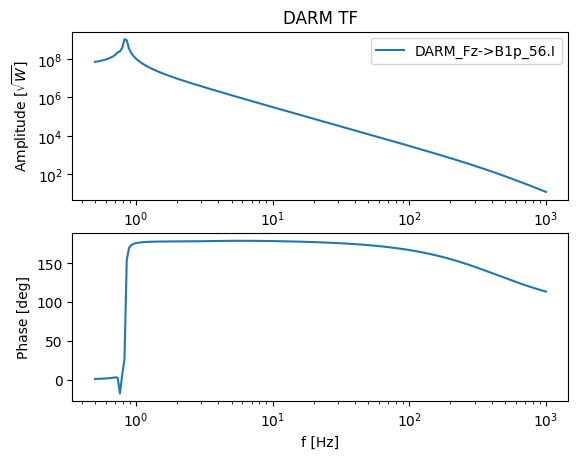

In [14]:
virgo.plot_DARM()